#Final Exam Dataset #2:  Movie Ratings

This is a dataset about Movies, obtained using data from IMDB.
(You can get amazing amounts of IMDB information from
<a href="ftp://ftp.fu-berlin.de/pub/misc/movies/database/">ftp://ftp.fu-berlin.de/pub/misc/movies/database/</a>)

Goal:  predict the IMDB rating of a move.
Specifically:  given the attributes of each input movie,
predict its IMDB rating.

The Rating column of the training set gives examples.
Each rating is a value of the form X.Y, where X and Y are single digits.
Your job is to predict these values as closely as possible.

A histogram of rating values is shown below,
near the end of this notebook.


##Schema of the Dataset

The dataset has the following columns:
<table>
<tr><td><b>Title</b></td><td> movie title</td></tr>
<tr><td><b>Year</b></td><td> year released</td></tr>
<tr><td><b>Length</b></td><td> length in minutes</td></tr>
<tr><td><b>Budget</b></td><td> production budget in US dollars (usually NA)</td></tr>

<tr><td><b>Rating</b></td><td> average rating of IMDB users</td></tr>
<tr><td><b>Votes</b></td><td> number of voting IMDB users</td></tr>

<tr><td><b>R1</b></td><td> approximate percentage of users voting for rating: 1</td></tr>
<tr><td><b>R2</b></td><td> approximate percentage of users voting for rating: 2</td></tr>
<tr><td><b>R3</b></td><td> approximate percentage of users voting for rating: 3</td></tr>
<tr><td><b>R4</b></td><td> approximate percentage of users voting for rating: 4</td></tr>
<tr><td><b>R5</b></td><td> approximate percentage of users voting for rating: 5</td></tr>
<tr><td><b>R6</b></td><td> approximate percentage of users voting for rating: 6</td></tr>
<tr><td><b>R7</b></td><td> approximate percentage of users voting for rating: 7</td></tr>
<tr><td><b>R8</b></td><td> approximate percentage of users voting for rating: 8</td></tr>
<tr><td><b>R9</b></td><td> approximate percentage of users voting for rating: 9</td></tr>
<tr><td><b>R10</b></td><td> approximate percentage of users voting for rating: 10</td></tr>

<tr><td><b>MPAA</b></td><td> MPAA parental guidance rating (blank, NC-17, PG, PG-13, R)</td></tr>

<tr><td><b>Action</b></td><td> 1 if Action, 0 otherwise</td></tr>
<tr><td><b>Animation</b></td><td> 1 if Animation, 0 otherwise</td></tr>
<tr><td><b>Comedy</b></td><td> 1 if Comedy, 0 otherwise</td></tr>
<tr><td><b>Drama</b></td><td> 1 if Drama, 0 otherwise</td></tr>
<tr><td><b>Documentary</b></td><td> 1 if Documentary, 0 otherwise</td></tr>
<tr><td><b>Romance</b></td><td> 1 if Romance, 0 otherwise</td></tr>
<tr><td><b>Short</b></td><td> 1 if Short Film, 0 otherwise</td></tr>
</table>

##Caution

The dataset has missing values (such as "NA" Budget values and blank MPAA ratings).
It also has skewed distributions.  Please take these things into account.


#A First Look at the Dataset

In [1]:
import pandas as pd
import numpy as np

Movies = pd.DataFrame.from_csv('Movies.csv')

Movies.head()

,Year,Length,Budget,Rating,Votes,R1,R2,R3,R4,R5,...,R9,R10,MPAA,Action,Animation,Comedy,Drama,Documentary,Romance,Short
Title,,,,,,,,,,,,,,,,,,,,,
$,1971,121,NaN,6.4,348,5,5,5,5,15,...,5,5,NaN,0,0,1,1,0,0,0
$1000 a Touchdown,1939,71,NaN,6.0,20,0,15,5,25,15,...,5,15,NaN,0,0,1,0,0,0,0
$21 a Day Once a Month,1941,7,NaN,8.2,5,0,0,0,0,0,...,25,25,NaN,0,1,0,0,0,0,1
"$40,000",1996,70,NaN,8.2,6,15,0,0,0,0,...,35,45,NaN,0,0,1,0,0,0,0
"$50,000 Climax Show, The",1975,71,NaN,3.4,17,25,5,0,15,15,...,0,25,NaN,0,0,0,0,0,0,0


In [6]:
movie_years = Movies[['Year']].values

earliest = np.min(movie_years)
latest = np.max(movie_years)

print((earliest, latest))

(1893, 2005)


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0)

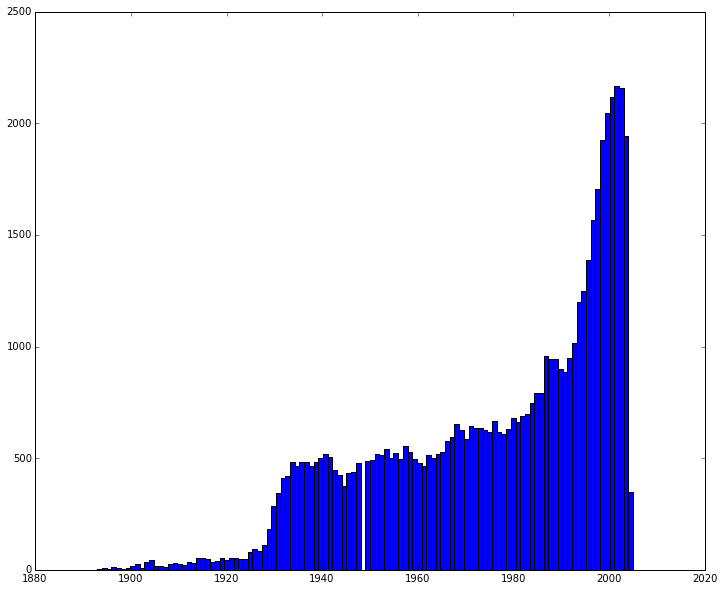

In [8]:
plt.hist( movie_years, bins=len(range(earliest,latest))+2 )
plt.show()

In [9]:
Movies.columns

Index([u'Year', u'Length', u'Budget', u'Rating', u'Votes', u'R1', u'R2', u'R3', u'R4', u'R5', u'R6', u'R7', u'R8', u'R9', u'R10', u'MPAA', u'Action', u'Animation', u'Comedy', u'Drama', u'Documentary', u'Romance', u'Short'], dtype='object')

In [10]:
movie_years[ (movie_years < 1900) ]

array([1897, 1899, 1896, 1899, 1899, 1896, 1896, 1895, 1896, 1897, 1896,
       1893, 1897, 1894, 1894, 1897, 1894, 1897, 1898, 1899, 1899, 1898,
       1895, 1894, 1894, 1894, 1899, 1899, 1896, 1896, 1894, 1899, 1894,
       1898, 1896, 1898, 1897, 1896, 1896, 1897, 1898, 1895, 1897, 1896,
       1897, 1894, 1899, 1896, 1896])

In [11]:
np.count_nonzero( movie_years < 1900 )

49

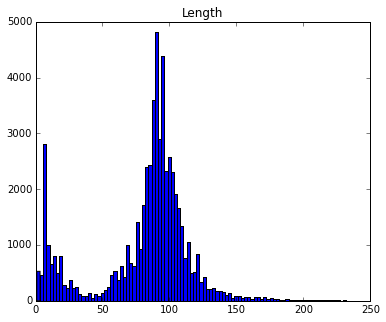

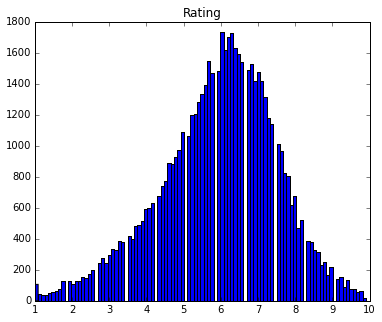

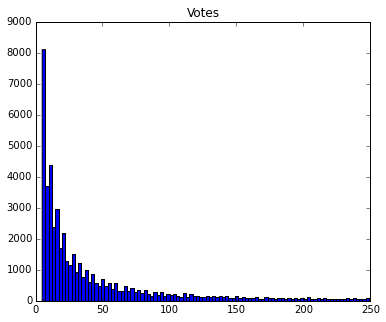

In [12]:
plt.rcParams['figure.figsize'] = (6.0, 5.0)

for ColName in ['Length', 'Rating', 'Votes']:  ### Movies.columns:
    ColValues = Movies[[ColName]].values
    if (ColName == 'Length'):
        ColValues = ColValues[ ColValues<240 ]  # ignore any movies over 4 hours
    if (ColName == 'Votes'):
        ColValues = ColValues[ ColValues<250 ]  # ignore any movie with over 250 votes
    plt.hist( ColValues, bins=100 )
    plt.title( ColName )
    plt.show()

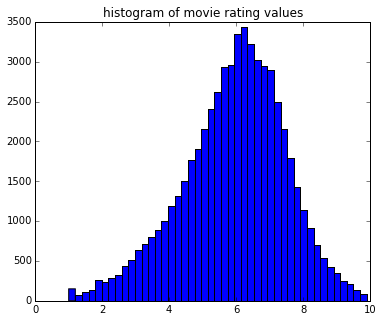

In [13]:
plt.hist( Movies[['Rating']].values, bins=45 )
plt.title('histogram of movie rating values')
plt.show()

#What your program's output should look like

Your program should output lines consisting of predicted rating values for the test set, like:
<pre>
5.6
7.2
9.1
...
8.4
</pre>
Each rating should be numeric value of the form  X.Y,
where X and Y are single digits.

##Example of how to format your output correctly for Mooshak

In [ ]:
# you can use the following code to generate output that is acceptable by Mooshak:

# generate the test labels
movie_rating_predictions = my_incredible_model.predict(x_test)                    

def two_digit_value(x):
    return ("%3.1f" % x)
    # return a value of the form X.Y, where X and Y are digits

output_str = "\n".join(map(two_digit_value, movie_rating_predictions)) 

# You might want to specify the exact path to output your text file
# Say, "C:\\cs249\\output_label.txt" for Windows users.
f = open('output_label.txt', 'w') 

f.write(output_str);
f.close()

# Then submit the .txt file to Mooshak